In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
df = pd.read_csv(r"C:\Users\Gyegn\OneDrive\Desktop\ML_project\notebook\data\StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Preparaing X and y variables
X = df.drop(['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'The numerical features in the data are:{numerical_features}')
print(f'The categorical features in the data are:{categorical_features}')

The numerical features in the data are:['math score', 'reading score', 'writing score']
The categorical features in the data are:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [8]:
gender_unique_values = df['gender'].unique()
race_ethnicity_unique_values = df['race/ethnicity'].unique()
parental_level_of_education = df['parental level of education'].unique()
lunch = df['lunch'].unique()
test_preparation_course = df['test preparation course'].unique()

print(f'Categories in gender:{gender_unique_values}')
print(f'Categories in race_ethnicity_unique_values:{race_ethnicity_unique_values}')
print(f'Categories in parental_level_of_education:{parental_level_of_education}')
print(f'Categories in lunch:{lunch}')
print(f'Categories in test_preparation_course:{test_preparation_course}')

Categories in gender:['female' 'male']
Categories in race_ethnicity_unique_values:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:['standard' 'free/reduced']
Categories in test_preparation_course:['none' 'completed']


In [9]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns


cat_encoder = OneHotEncoder()
num_encoder = StandardScaler()

preprocessing = ColumnTransformer([
    ('OneHotEncoder',cat_encoder,cat_features),
    ('StandardScaler',num_encoder,num_features)
]
)

In [10]:
X=preprocessing.fit_transform(X)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
# Split the data into train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [22]:
def model_evaluation(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [24]:
models ={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-NearestNeighbor": KNeighborsRegressor(),
    "Decision_Tree": DecisionTreeRegressor(),
    "Random_forest": RandomForestRegressor(),
    "XGBRegression": XGBRegressor(),
    "Catboosting": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) #model training

    # Model predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the train and test datasets
    model_train_mae, model_train_rmse,model_train_r2_score = model_evaluation(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = model_evaluation(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model_performance for training set is:')
    print(' -Root Mean Squaure Error:{:.3f}'.format(model_train_rmse))
    print(' -Mean Absolute Error:{:.3f}'.format(model_train_mae))
    print(' -r2_score:{:.3f}'.format(model_train_r2_score))

    print('---------------------------------------------------')

    print('model_performance for test set is:')
    print(' -Root Mean Squaure Error:{:.3f}'.format(model_test_rmse))
    print(' -Mean Absolute Error:{:.3f}'.format(model_test_mae))
    print(' -r2_score:{:.3f}'.format(model_test_r2_score))
    r2_list.append(model_test_r2_score)

    print('='*35)
    
    print('\n')


LinearRegression
model_performance for training set is:
 -Root Mean Squaure Error:5.329
 -Mean Absolute Error:4.271
 -r2_score:0.874
---------------------------------------------------
model_performance for test set is:
 -Root Mean Squaure Error:5.425
 -Mean Absolute Error:4.222
 -r2_score:0.879


Lasso
model_performance for training set is:
 -Root Mean Squaure Error:6.594
 -Mean Absolute Error:5.206
 -r2_score:0.807
---------------------------------------------------
model_performance for test set is:
 -Root Mean Squaure Error:6.520
 -Mean Absolute Error:5.158
 -r2_score:0.825


Ridge
model_performance for training set is:
 -Root Mean Squaure Error:5.323
 -Mean Absolute Error:4.265
 -r2_score:0.874
---------------------------------------------------
model_performance for test set is:
 -Root Mean Squaure Error:5.390
 -Mean Absolute Error:4.211
 -r2_score:0.881


K-NearestNeighbor
model_performance for training set is:
 -Root Mean Squaure Error:5.708
 -Mean Absolute Error:4.517
 -r2_sco

In [30]:
# print results
Model_r2_performance = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 Score'])
Model_r2_performance.sort_values(by=['R2 Score'],ascending=False)

,Model name,R2 Score
2,Ridge,0.880593
0,LinearRegression,0.879046
5,Random_forest,0.855091
7,Catboosting,0.851632
8,AdaBoost,0.844459
6,XGBRegression,0.827797
1,Lasso,0.825320
3,K-NearestNeighbor,0.783813
4,Decision_Tree,0.743937


In [31]:
# Linear Regression
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 87.90


Text(0, 0.5, 'Actual')

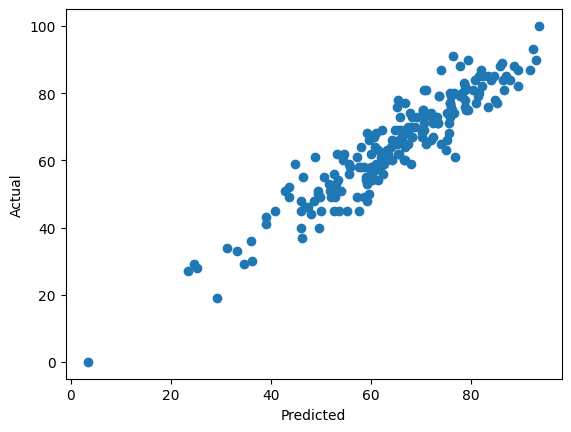

In [33]:
# Plot the performance
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')

<Axes: xlabel='math score'>

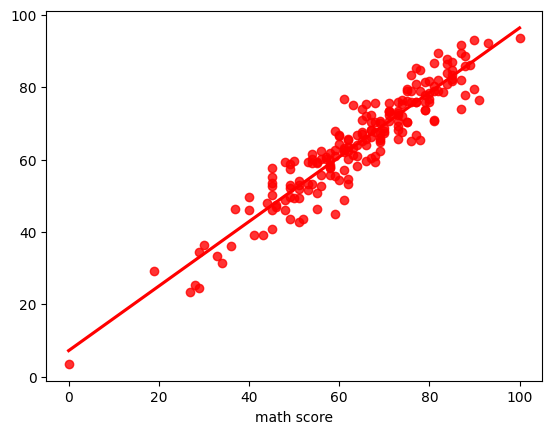

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [36]:
# Difference between actual value and predicted value
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
